In [1]:
import numpy as np
from eureka.activation import relu, sigmoid, sigmoid_prime, softmax
from eureka.utils import one_hot_encoder, dataloader
from eureka.losses import cross_entropy_loss
import eureka.optim as optim
import eureka.nn as nn
import datasets.mnist

In [2]:
# Load dataset  
train_x, train_y = datasets.mnist.load_dataset(download=True, train=True)
test_x, test_y = datasets.mnist.load_dataset(download=True, train=False)

# Preprocess Dataset
x = train_x.reshape(train_x.shape[0], -1)
x_test = test_x.reshape(test_x.shape[0], -1)
num_samples = x.shape[0]

# Prepare the dataloader
trainloader = dataloader(x, x, batch_size=64, shuffle=True)
testloader = dataloader(x_test, x_test, batch_size=64, shuffle=True)

Found and verified data/t10k-images-idx3-ubyte.gz
Found and verified data/t10k-labels-idx1-ubyte.gz
Found and verified data/train-images-idx3-ubyte.gz
Found and verified data/train-labels-idx1-ubyte.gz
Found and verified data/t10k-images-idx3-ubyte.gz
Found and verified data/t10k-labels-idx1-ubyte.gz
Found and verified data/train-images-idx3-ubyte.gz
Found and verified data/train-labels-idx1-ubyte.gz


In [3]:
# Discriminator Model
model = nn.Sequential([
    nn.Linear(784, 64),
    nn.Sigmoid(),
    nn.Linear(64, 784),
    nn.Sigmoid()
])

# Define the optimizer
optimizer = optim.Adam(model, lr=0.0002)

In [4]:
def mse_loss(inputs, targets):
    return 0.5 * np.power(np.mean(inputs - targets), 2)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
def visualize(real_images, fake_images):
    fig = plt.figure(figsize=(25, 4))
    for index in np.arange(20):
        ax = fig.add_subplot(2, 20/2, index+1, xticks=[], yticks=[])
        if index < 10:
            ax.imshow(real_images[index], cmap='gray')
        else:
            ax.imshow(fake_images[index-10], cmap='gray')
        
    plt.show()

In [6]:
def train(model, optimizer):
    num_epochs = 50
    for epoch in range(1, num_epochs+1):
        print("Epoch: {}/{}\n==========".format(epoch, num_epochs))
        acc = 0
        batch_loss = 0
        
        for inputs, targets in trainloader:
            # Number of samples per batch
            m = inputs.shape[0]

            # Forward Propagation
            out = model.forward(inputs)

            # Compute loss
            batch_loss += mse_loss(out, targets)
            
            # Backprop Var
            back_var = out - targets

            # Backward Propagation
            model.backward(back_var)

            # Optimization Step
            optimizer.step()
            
            okat = inputs
            
        # Visualization
        real_images = inputs.reshape(inputs.shape[0], 28, 28)[:10]
        fake_images = out.reshape(out.shape[0], 28, 28)[:10]
        visualize(real_images, fake_images)

        print("Loss: {:.6f}".format(batch_loss))
        print("Accuracy: {:.2f}%\n".format(acc/num_samples*100))
        
    return model

Epoch: 1/50


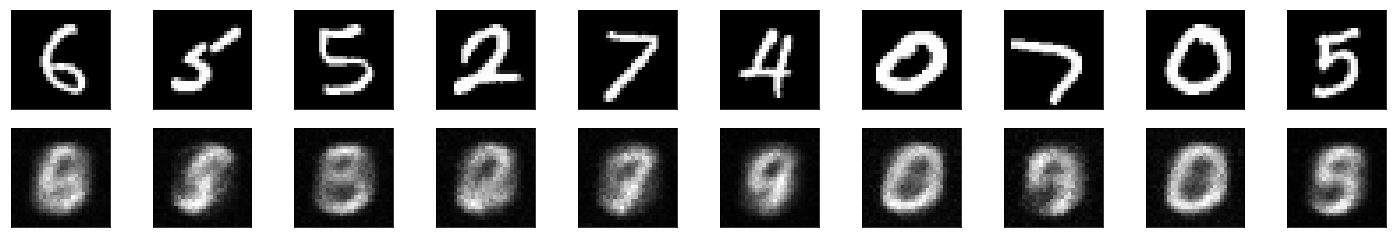

Loss: 1.334448
Accuracy: 0.00%

Epoch: 2/50


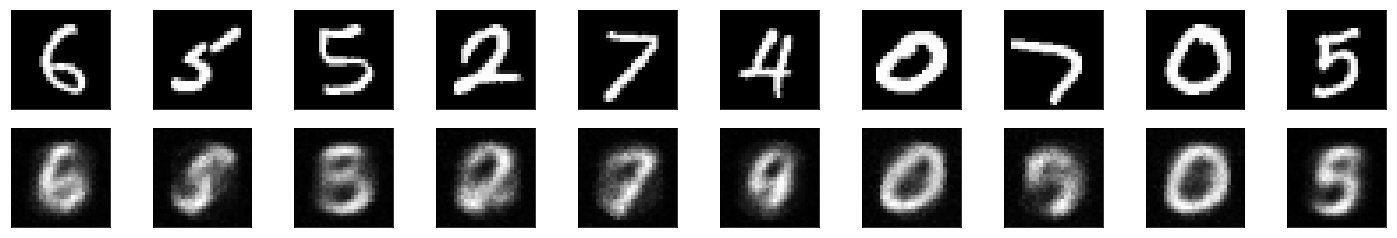

Loss: 0.158523
Accuracy: 0.00%

Epoch: 3/50


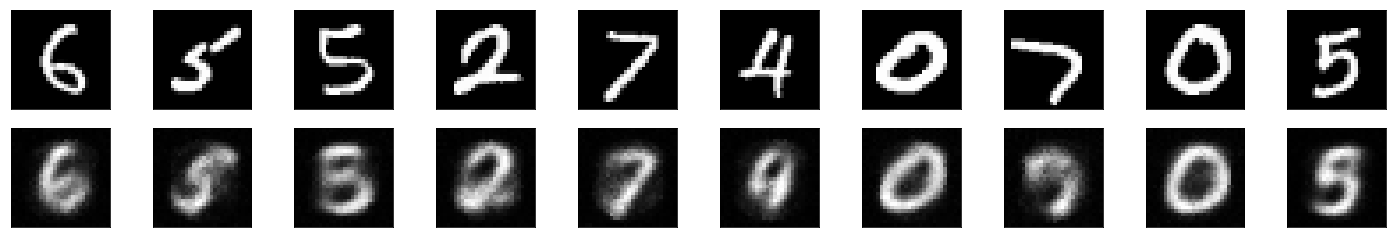

Loss: 0.130527
Accuracy: 0.00%

Epoch: 4/50


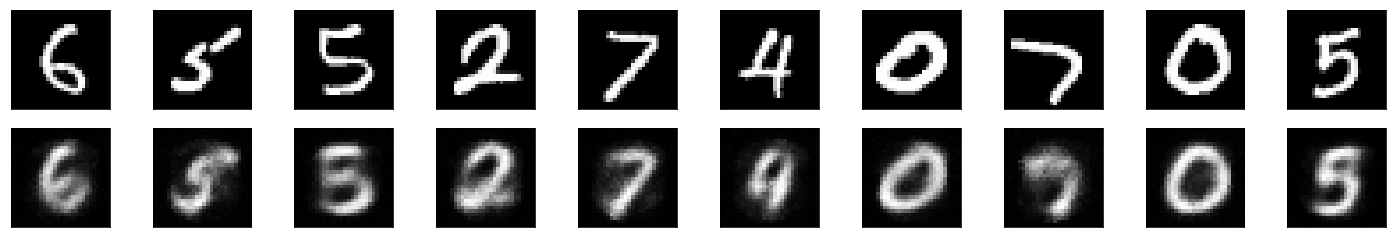

Loss: 0.108816
Accuracy: 0.00%

Epoch: 5/50


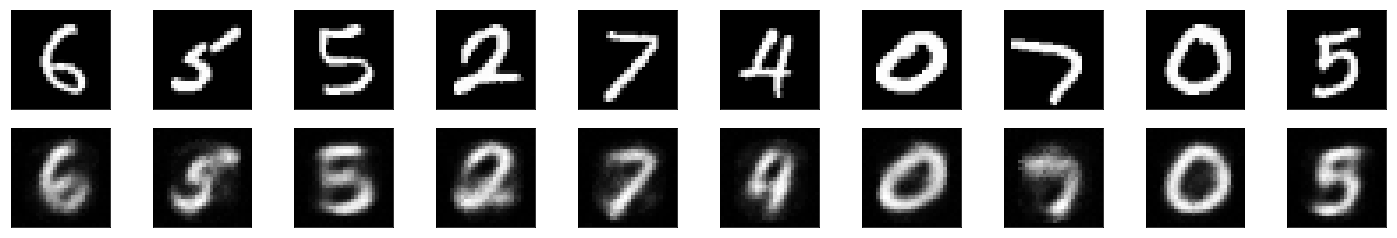

Loss: 0.090703
Accuracy: 0.00%

Epoch: 6/50


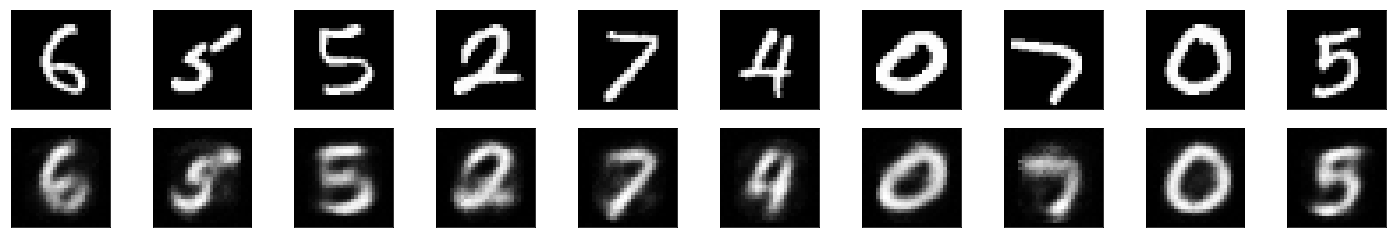

Loss: 0.078523
Accuracy: 0.00%

Epoch: 7/50


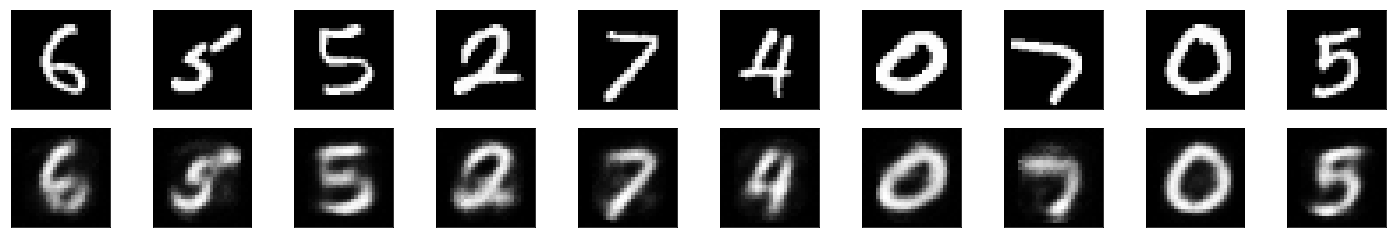

Loss: 0.068707
Accuracy: 0.00%

Epoch: 8/50


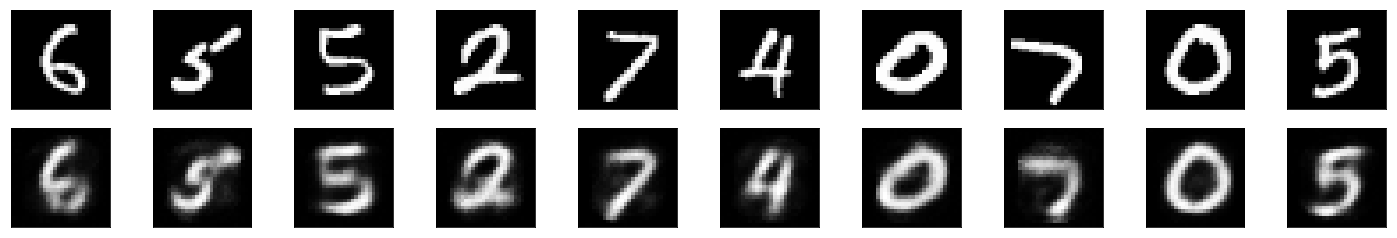

Loss: 0.059868
Accuracy: 0.00%

Epoch: 9/50


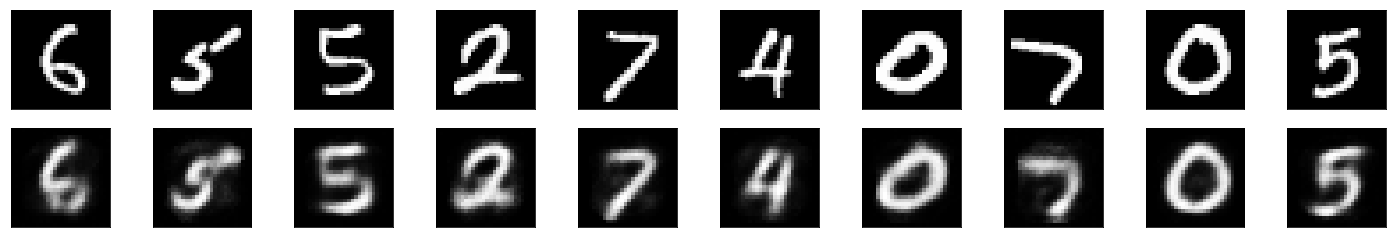

Loss: 0.053319
Accuracy: 0.00%

Epoch: 10/50


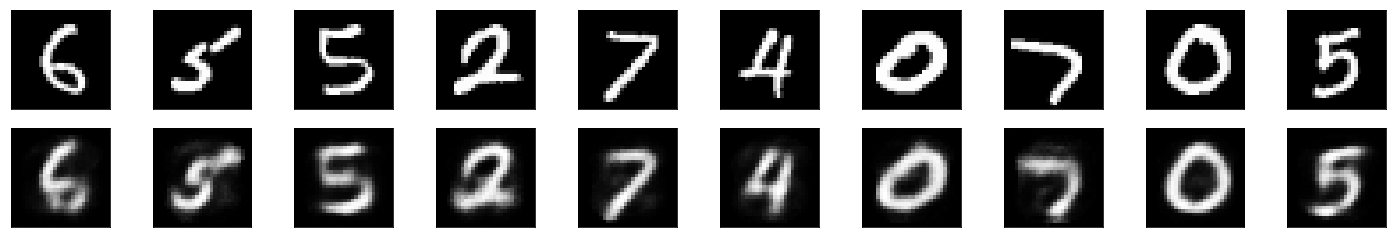

Loss: 0.047786
Accuracy: 0.00%

Epoch: 11/50


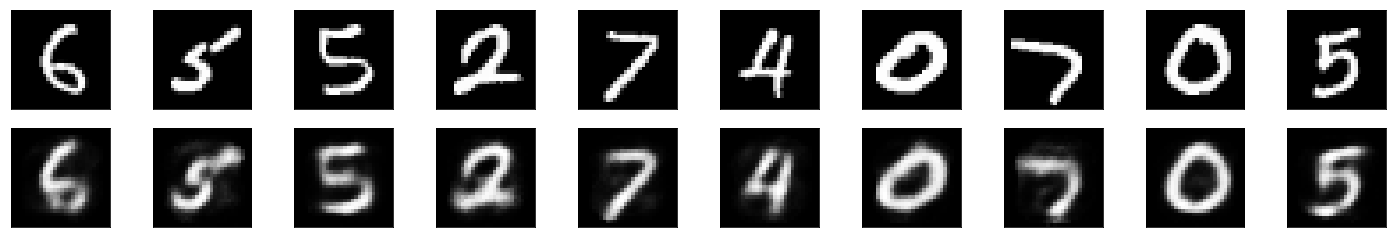

Loss: 0.043397
Accuracy: 0.00%

Epoch: 12/50


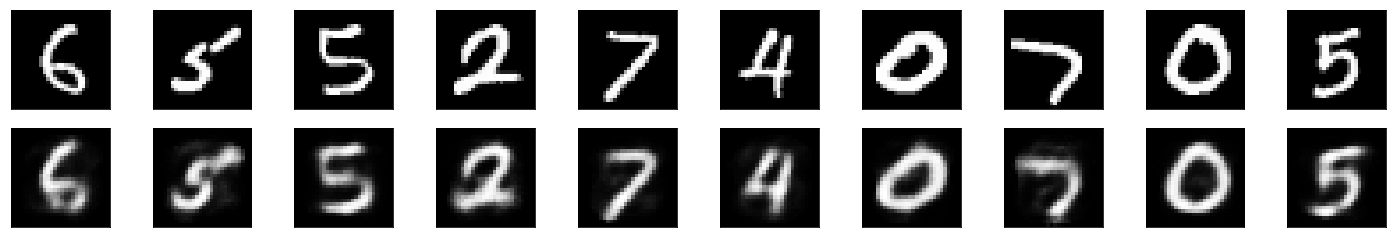

Loss: 0.039824
Accuracy: 0.00%

Epoch: 13/50


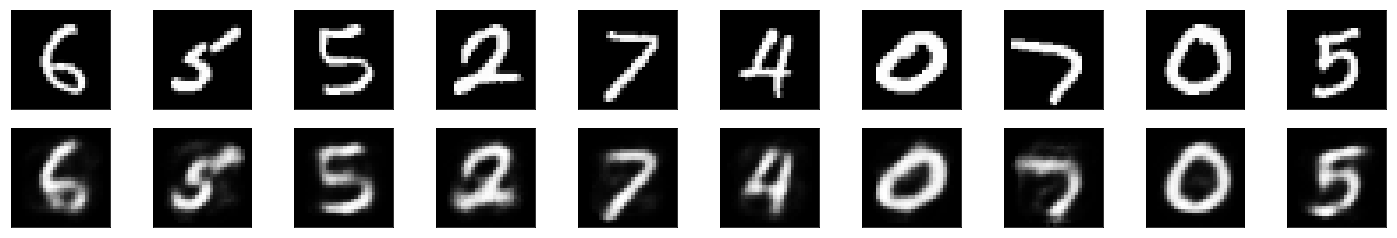

Loss: 0.036963
Accuracy: 0.00%

Epoch: 14/50


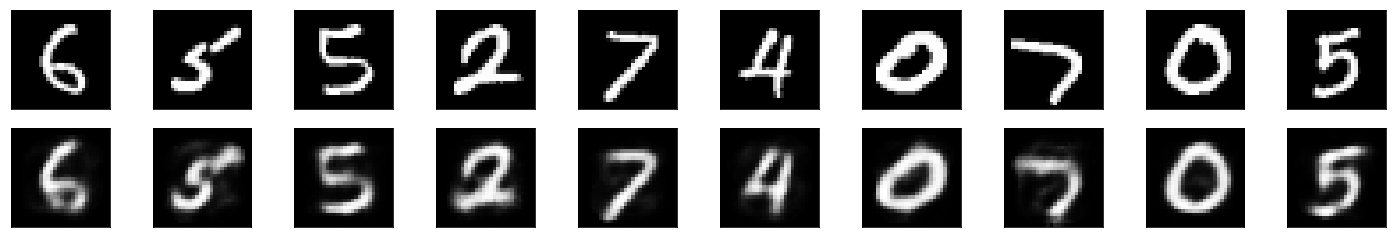

Loss: 0.034414
Accuracy: 0.00%

Epoch: 15/50


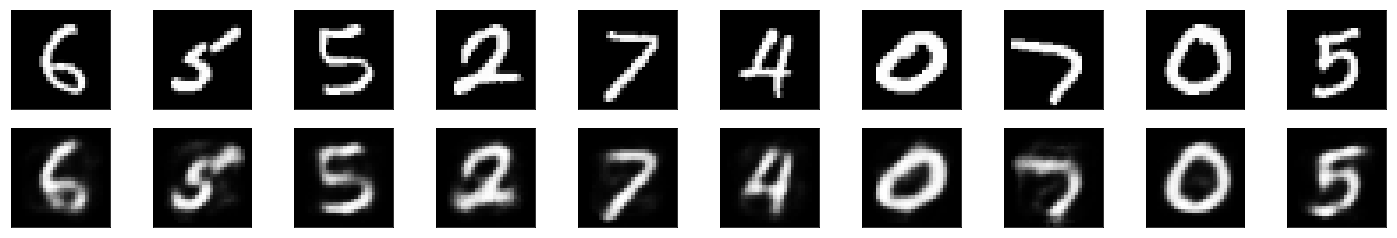

Loss: 0.032332
Accuracy: 0.00%

Epoch: 16/50


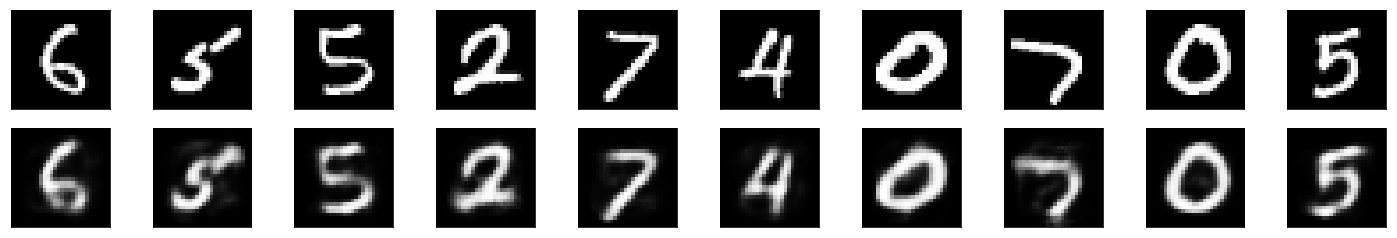

Loss: 0.030575
Accuracy: 0.00%

Epoch: 17/50


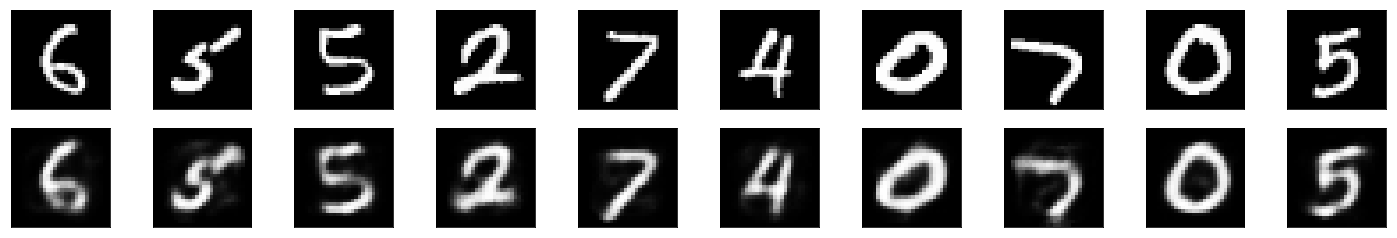

Loss: 0.029022
Accuracy: 0.00%

Epoch: 18/50


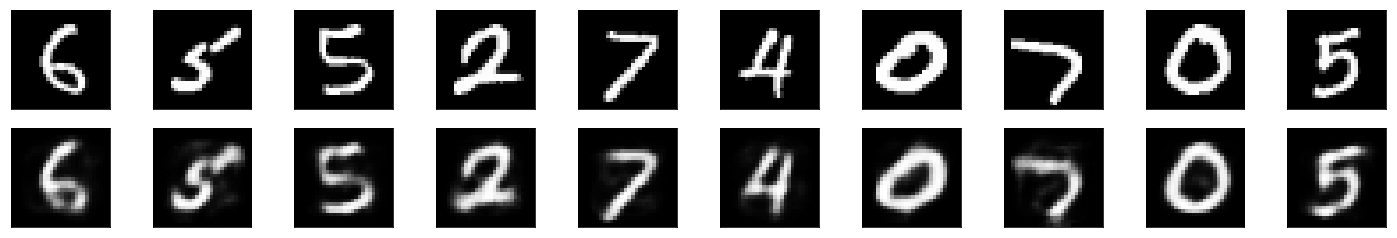

Loss: 0.027656
Accuracy: 0.00%

Epoch: 19/50


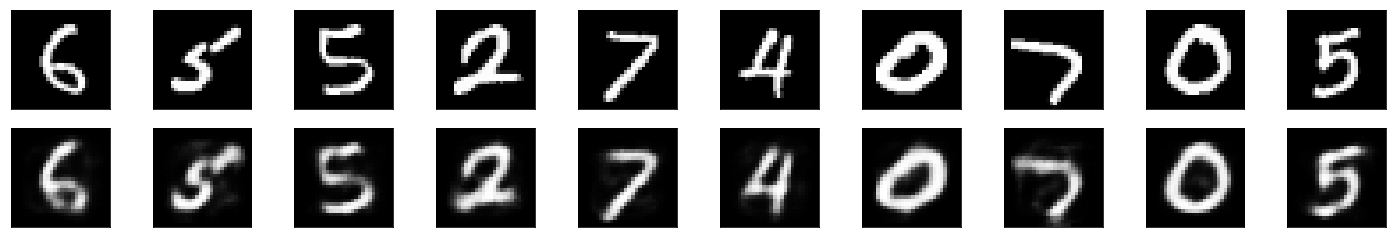

Loss: 0.026488
Accuracy: 0.00%

Epoch: 20/50


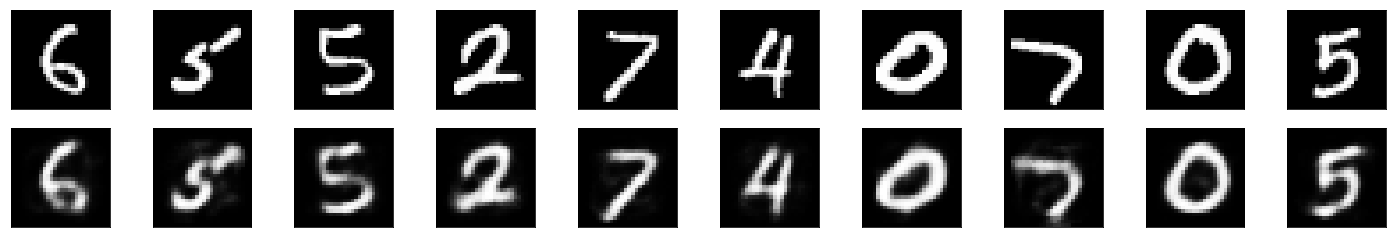

Loss: 0.025172
Accuracy: 0.00%

Epoch: 21/50


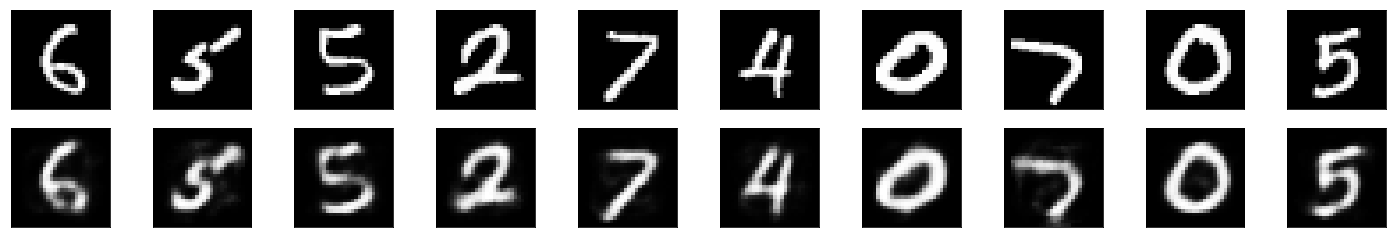

Loss: 0.024028
Accuracy: 0.00%

Epoch: 22/50


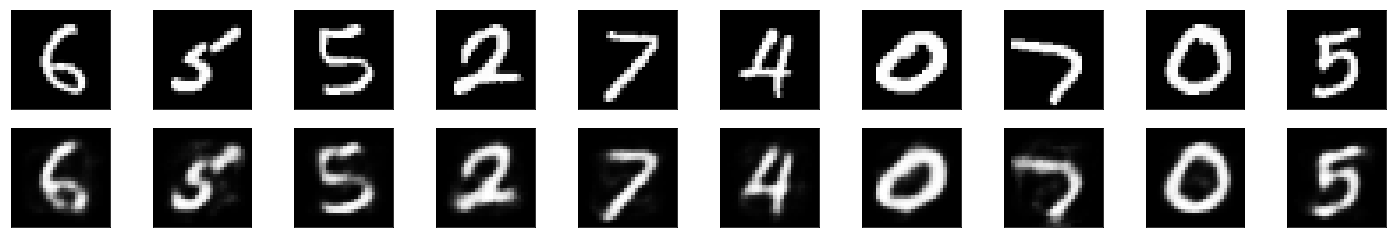

Loss: 0.023117
Accuracy: 0.00%

Epoch: 23/50


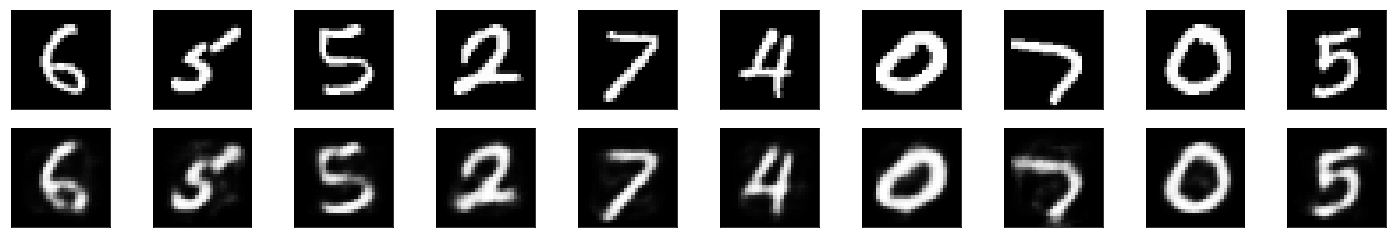

Loss: 0.022489
Accuracy: 0.00%

Epoch: 24/50


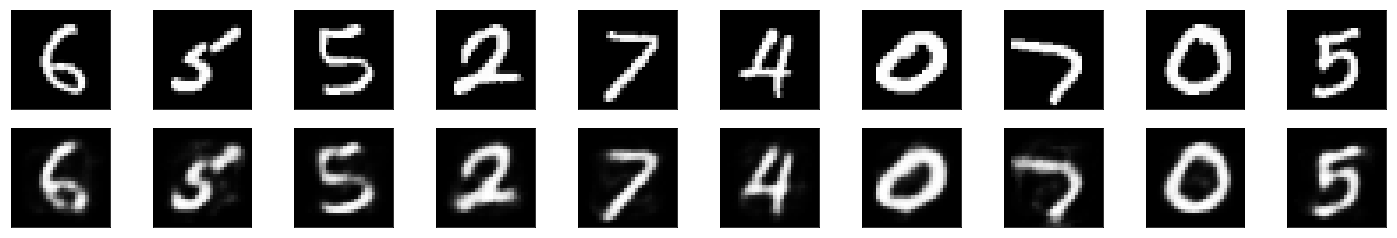

Loss: 0.021882
Accuracy: 0.00%

Epoch: 25/50


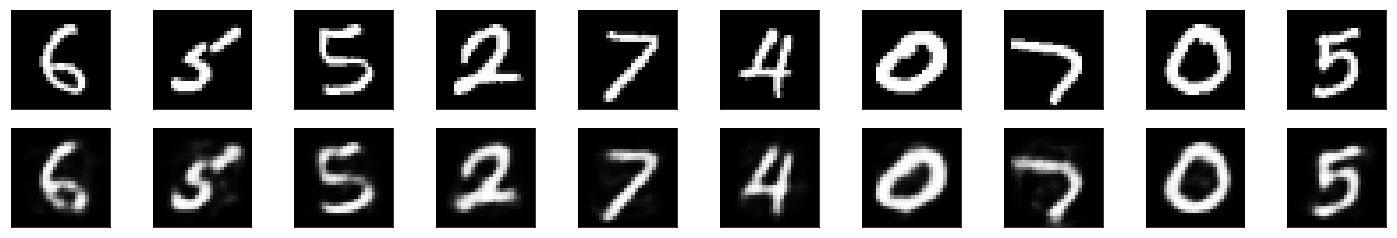

Loss: 0.021342
Accuracy: 0.00%

Epoch: 26/50


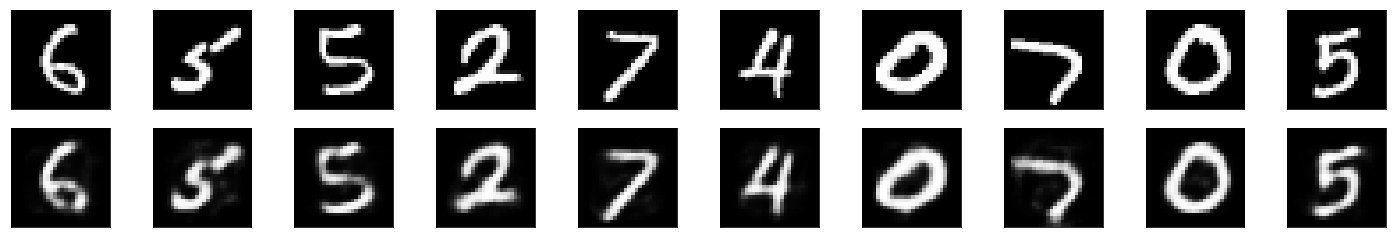

Loss: 0.020816
Accuracy: 0.00%

Epoch: 27/50


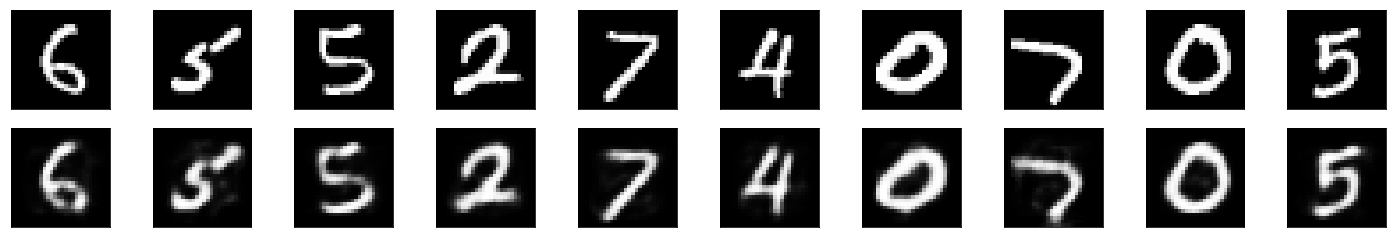

Loss: 0.020300
Accuracy: 0.00%

Epoch: 28/50


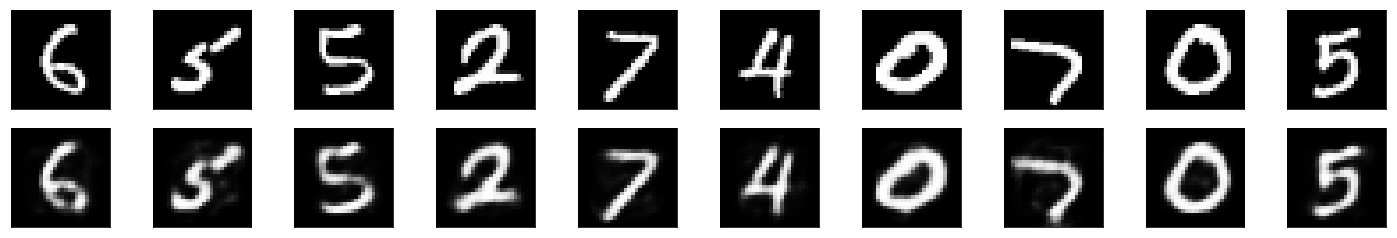

Loss: 0.019796
Accuracy: 0.00%

Epoch: 29/50


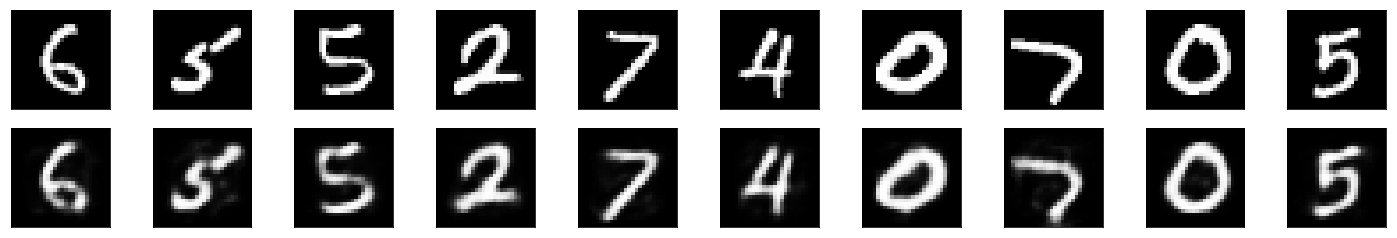

Loss: 0.019308
Accuracy: 0.00%

Epoch: 30/50


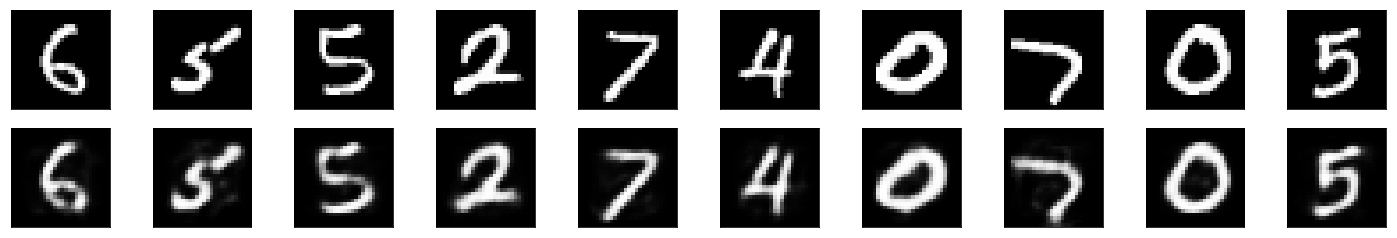

Loss: 0.018836
Accuracy: 0.00%

Epoch: 31/50


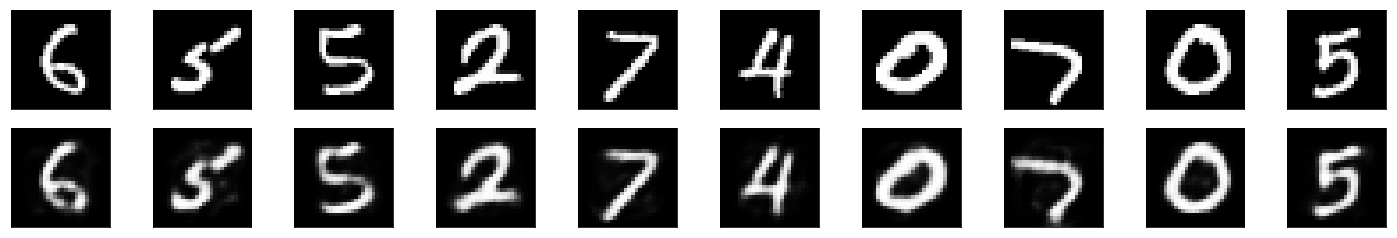

Loss: 0.018383
Accuracy: 0.00%

Epoch: 32/50


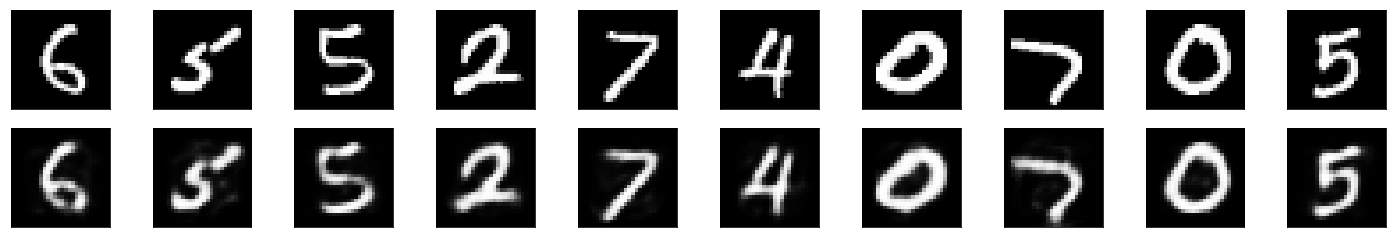

Loss: 0.017947
Accuracy: 0.00%

Epoch: 33/50


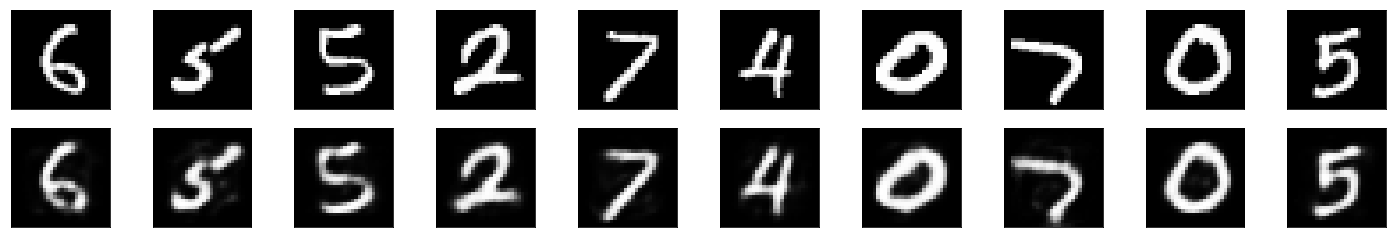

Loss: 0.017529
Accuracy: 0.00%

Epoch: 34/50


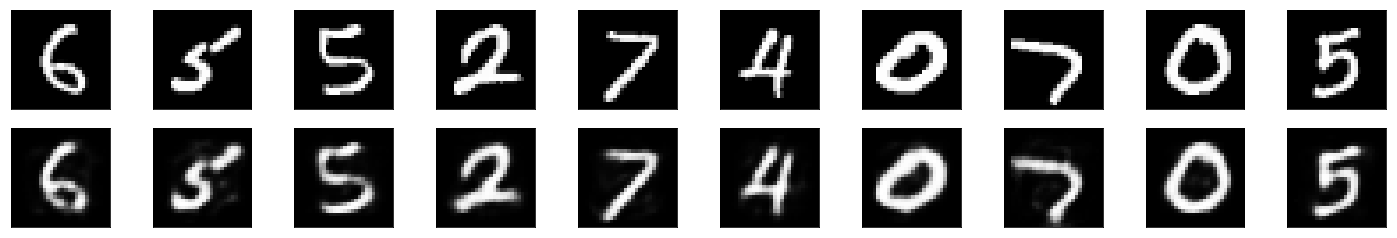

Loss: 0.017129
Accuracy: 0.00%

Epoch: 35/50


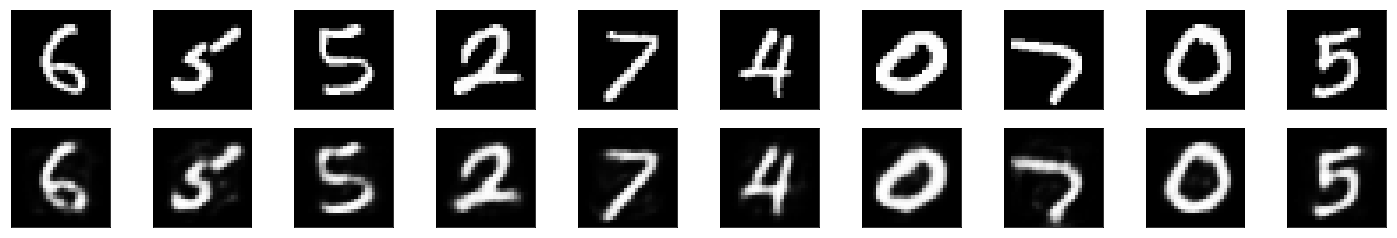

Loss: 0.016744
Accuracy: 0.00%

Epoch: 36/50


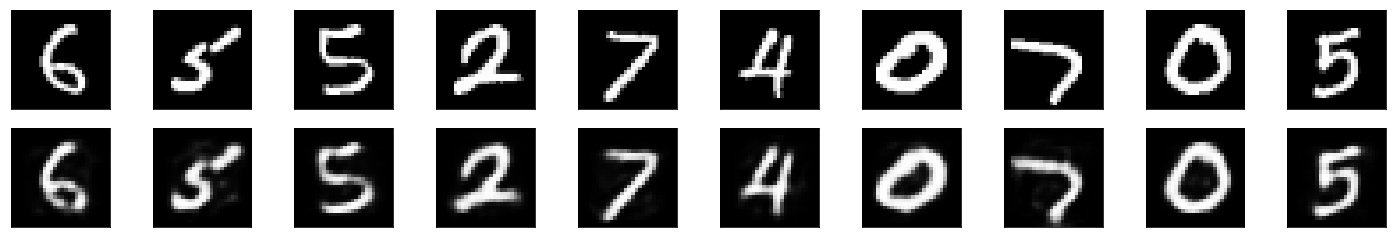

Loss: 0.016376
Accuracy: 0.00%

Epoch: 37/50


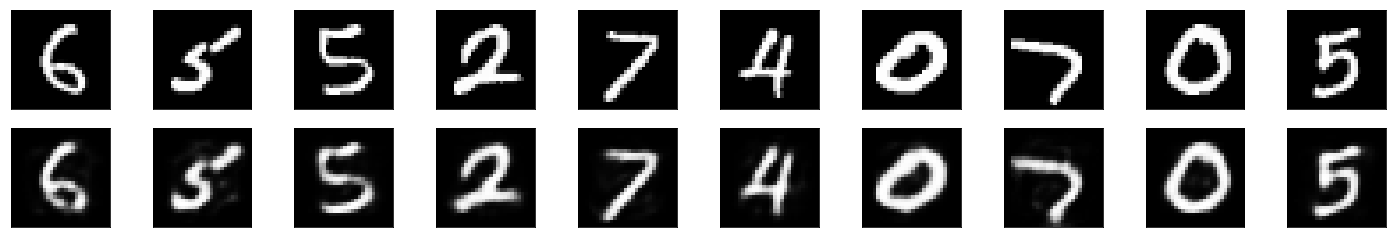

Loss: 0.016023
Accuracy: 0.00%

Epoch: 38/50


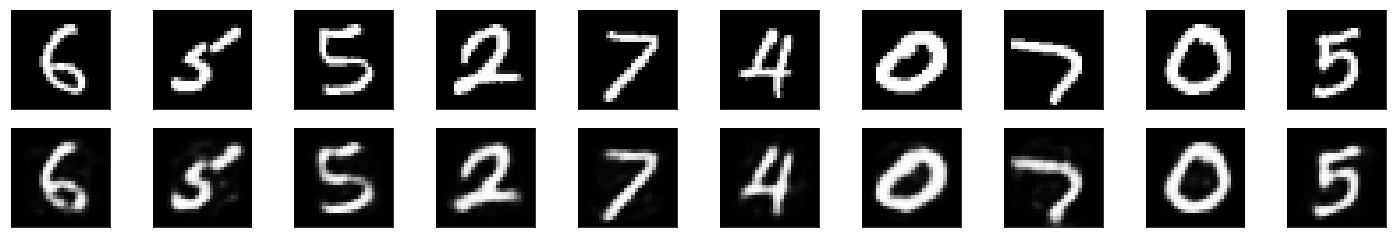

Loss: 0.015684
Accuracy: 0.00%

Epoch: 39/50


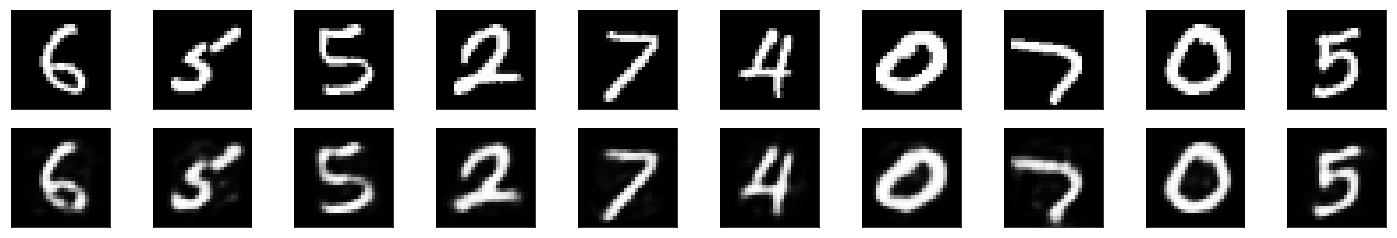

Loss: 0.015359
Accuracy: 0.00%

Epoch: 40/50


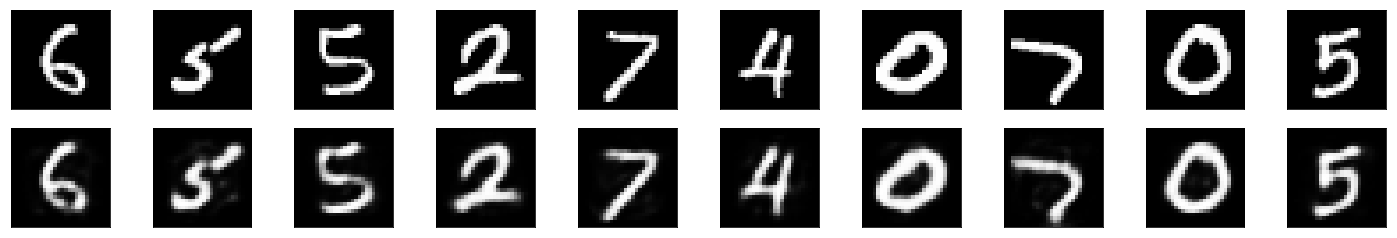

Loss: 0.015048
Accuracy: 0.00%

Epoch: 41/50


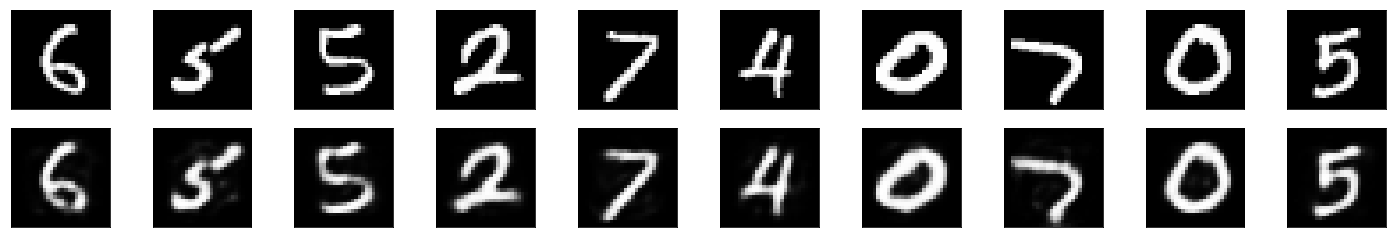

Loss: 0.014749
Accuracy: 0.00%

Epoch: 42/50


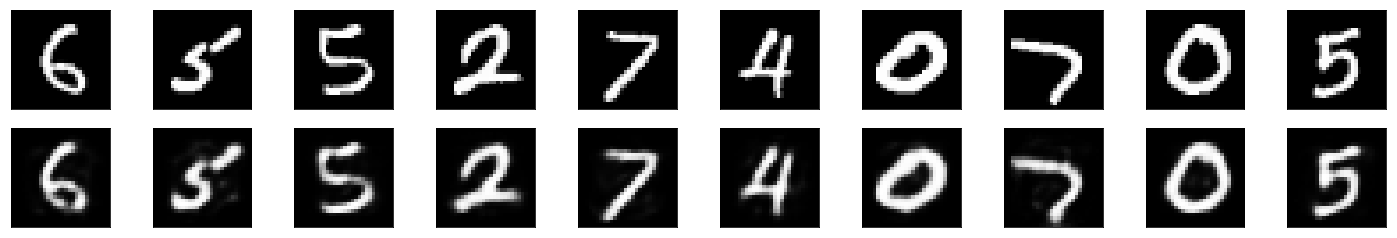

Loss: 0.014463
Accuracy: 0.00%

Epoch: 43/50


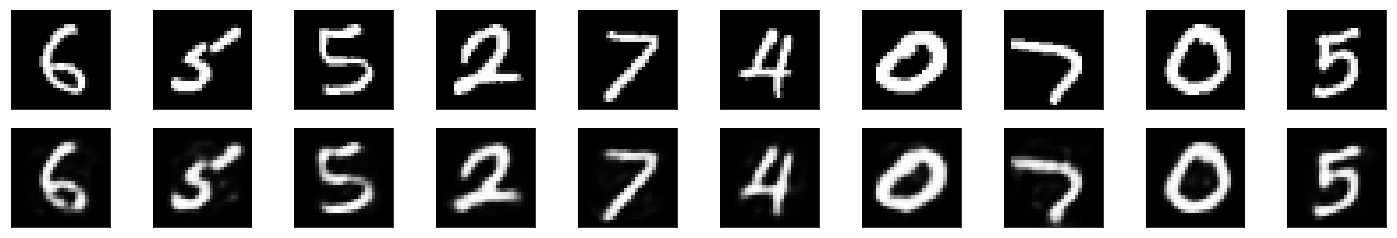

Loss: 0.014188
Accuracy: 0.00%

Epoch: 44/50


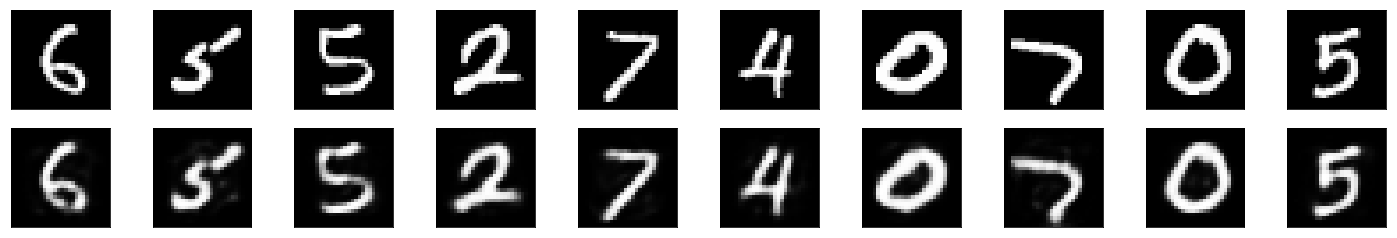

Loss: 0.013925
Accuracy: 0.00%

Epoch: 45/50


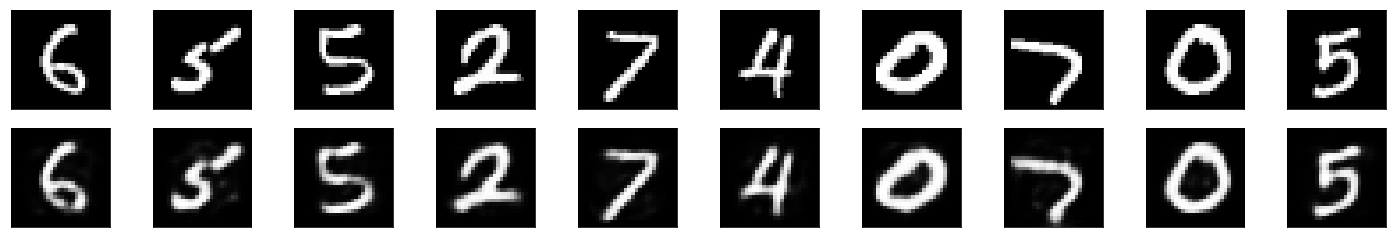

Loss: 0.013671
Accuracy: 0.00%

Epoch: 46/50


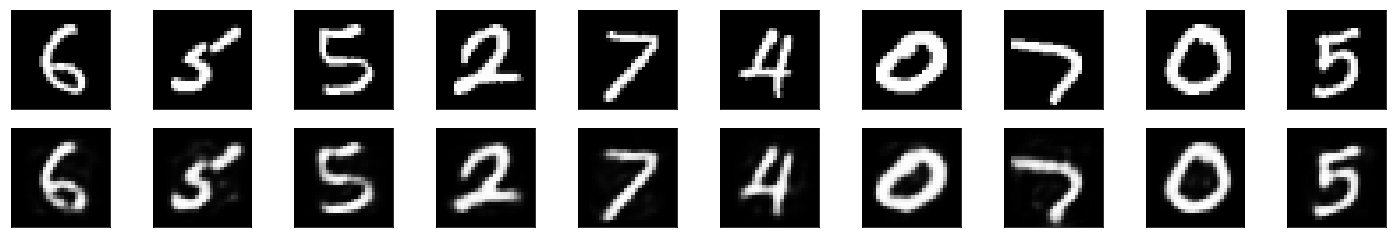

Loss: 0.013428
Accuracy: 0.00%

Epoch: 47/50


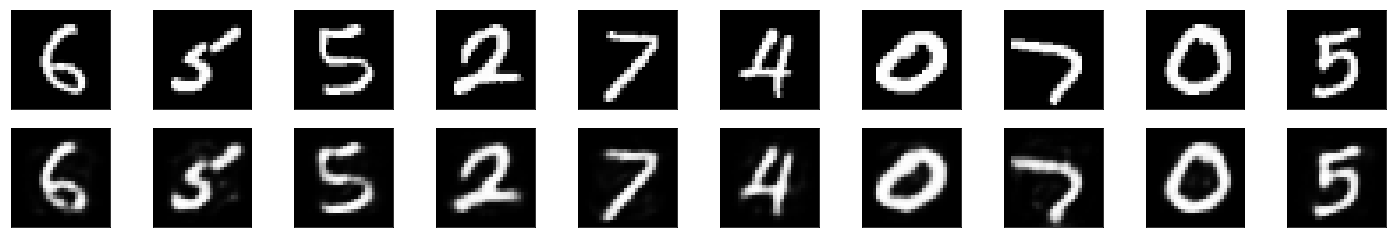

Loss: 0.013194
Accuracy: 0.00%

Epoch: 48/50


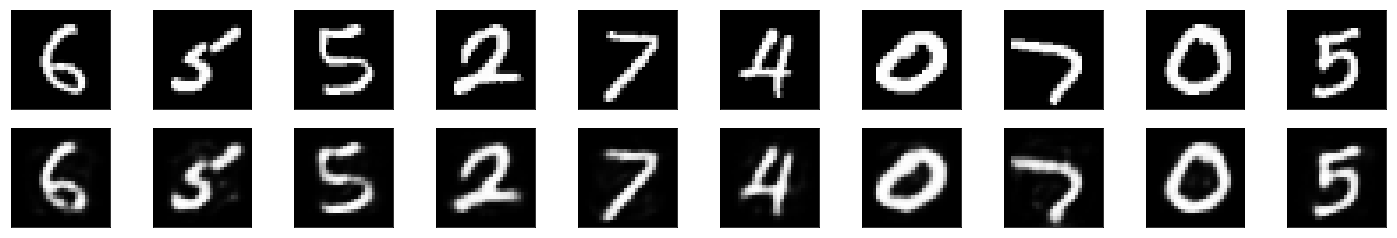

Loss: 0.012968
Accuracy: 0.00%

Epoch: 49/50


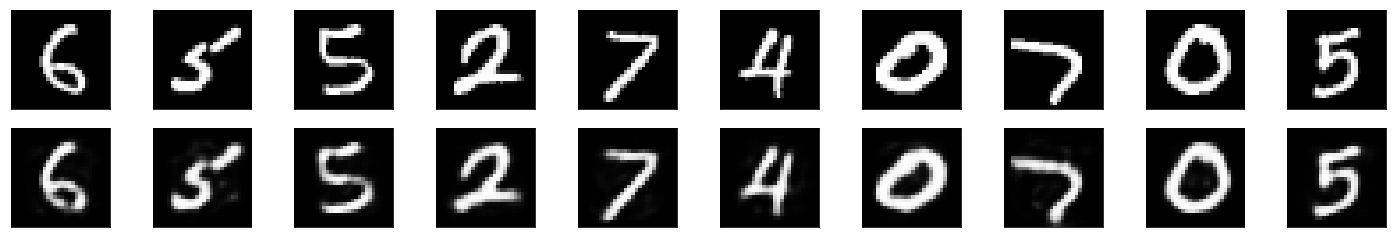

Loss: 0.012752
Accuracy: 0.00%

Epoch: 50/50


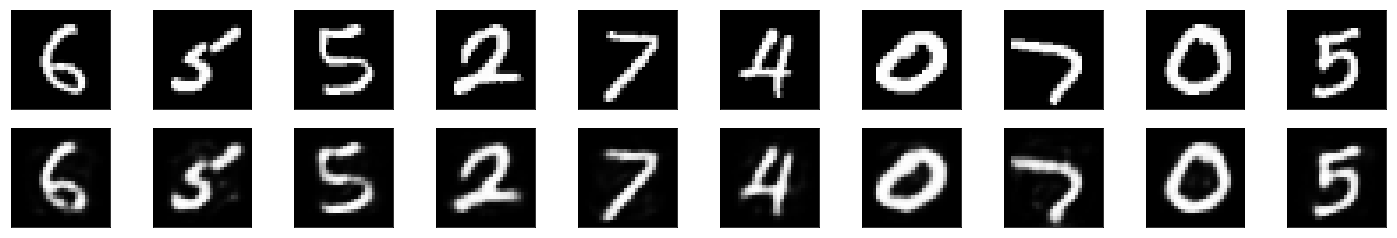

Loss: 0.012543
Accuracy: 0.00%



In [7]:
lets_c = train(model, optimizer)

# Autoencoder on Unseen data

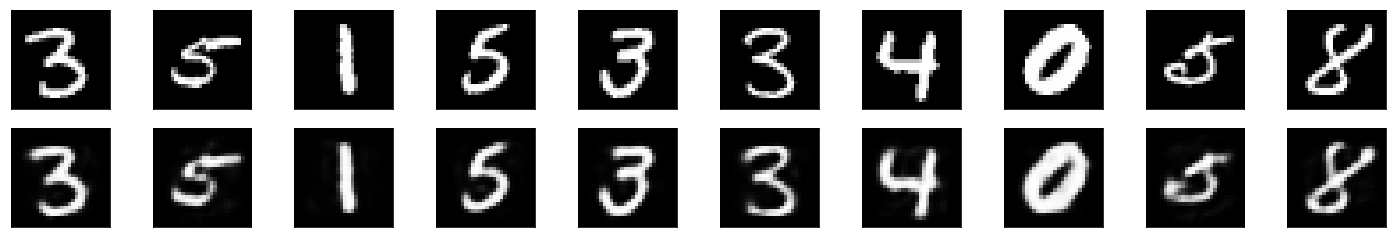

In [8]:
x_test, _ = testloader[0]
out_test = model.forward(x_test)
out_test = out_test.reshape(out_test.shape[0], 28, 28)
x_test = x_test.reshape(x_test.shape[0], 28, 28)

visualize(x_test, out_test)

# Denoising Autoencoder

In [25]:
x_test, _ = testloader[3]
noise_factor = 0.2
noise = noise_factor * np.random.randn(*(x_test.shape))
x_test += noise
x_test = np.clip(x_test, 0, 1)

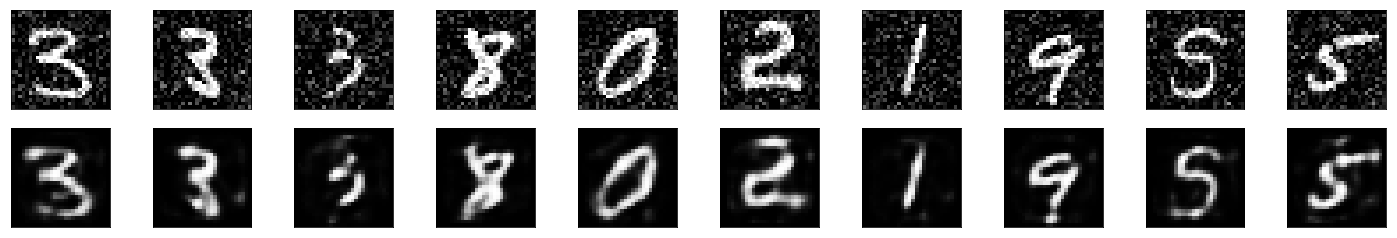

In [26]:
out_test = model.forward(x_test)
out_test = out_test.reshape(out_test.shape[0], 28, 28)
x_test = x_test.reshape(x_test.shape[0], 28, 28)

visualize(x_test, out_test)